<a href="https://colab.research.google.com/github/LaraAyrolla/Python-Projects/blob/main/artificial-intelligence/visao-computacional/taylor-swift/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Visão Computacional - "É a Taylor Swift?"**

*   Taylor Swift (1)
*   Outra pessoa (0)





In [ ]:
import cv2
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
# Função para carregar as imagens e ajustar o tamanho delas
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))
            img = img_to_array(img)
            img = img / 255.0
            images.append(img)
    return np.array(images)

In [ ]:
# Carregar as imagens e definir o valor atribuído a elas para o modelo (0 ou 1)
taylor_swift_dir = '/content/taylor_swift'
taylor_swift_images = load_images_from_folder(taylor_swift_dir)
taylor_swift_labels = np.ones(len(taylor_swift_images))

outras_pessoas_dir = '/content/outras_pessoas'
outras_pessoas_images = load_images_from_folder(outras_pessoas_dir)
outras_pessoas_labels = np.zeros(len(outras_pessoas_images))

In [ ]:
# Juntar as imagens e valores atribuídos das duas metades da base de dados
X = np.concatenate((taylor_swift_images, outras_pessoas_images))
Y = np.concatenate((taylor_swift_labels, outras_pessoas_labels))

In [ ]:
# Separar os dados para treino e para teste
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Arquitetura do modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Alterar as imagens para aumentar e diversificar a base e aplicar aos dados de treino
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False
)

datagen.fit(xtrain)

In [ ]:
# Treino do modelo
history = model.fit(datagen.flow(xtrain, ytrain, batch_size=32), validation_data=(xtest, ytest), epochs=25, verbose=1)

Epoch 1/25
15/15 [==============================] - 23s 1s/step - loss: 3.2975 - accuracy: 0.5208 - val_loss: 0.7848 - val_accuracy: 0.5583
Epoch 2/25
15/15 [==============================] - 18s 1s/step - loss: 0.7158 - accuracy: 0.5167 - val_loss: 0.6839 - val_accuracy: 0.5333
Epoch 3/25
15/15 [==============================] - 18s 1s/step - loss: 0.6874 - accuracy: 0.5312 - val_loss: 0.6831 - val_accuracy: 0.5333
Epoch 4/25
15/15 [==============================] - 18s 1s/step - loss: 0.6930 - accuracy: 0.5146 - val_loss: 0.6820 - val_accuracy: 0.5500
Epoch 5/25
15/15 [==============================] - 18s 1s/step - loss: 0.6899 - accuracy: 0.5188 - val_loss: 0.6822 - val_accuracy: 0.5500
Epoch 6/25
15/15 [==============================] - 19s 1s/step - loss: 0.6902 - accuracy: 0.5208 - val_loss: 0.6816 - val_accuracy: 0.5417
Epoch 7/25
15/15 [==============================] - 17s 1s/step - loss: 0.6879 - accuracy: 0.5250 - val_loss: 0.6817 - val_accuracy: 0.5500
Epoch 8/25
15/15 [==

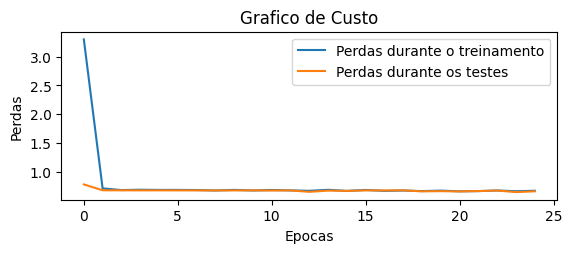

In [ ]:
plt.subplot(211)
plt.title('Grafico de Custo')
plt.plot(history.history['loss'],label= 'Perdas durante o treinamento')
plt.plot(history.history['val_loss'],label= 'Perdas durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()
plt.show()

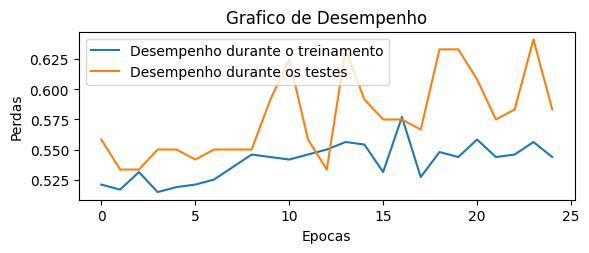

In [ ]:
plt.subplot(212)
plt.title('Grafico de Desempenho')
plt.plot(history.history['accuracy'],label= 'Desempenho durante o treinamento')
plt.plot(history.history['val_accuracy'],label= 'Desempenho durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()
plt.show()

In [ ]:
ytest

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0.])

In [ ]:
# predict probabilities for test set
previsto = model.predict(xtest, verbose=0)


In [ ]:
previsto


array([[0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.4916009 ],
       [0.4959038 ],
       [0.513055  ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5484881 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.38643953],
       [0.5064832 ],
       [0.5064832 ],
       [0.79941046],
       [0.5064832 ],
       [0.5064832 ],
       [0.5064832 ],
       [0.69169325],
       [0.5064832 ],
       [0.5064832 ],
       [0.08005536],
       [0.5064832 ],
       [0.5064832 ],
       [0.590103  ],
       [0.506

In [ ]:
print(confusion_matrix(ytest.astype(int), previsto.round().astype(int)))

[[10 47]
 [ 3 60]]


In [ ]:
# ROC AUC
auc = roc_auc_score(ytest, previsto)
print('ROC AUC: %f' % auc)


ROC AUC: 0.613617


In [ ]:
previsto = previsto.round()

In [ ]:
#print("Valores reais: ", ytest)
#print("Valores previsto pela RNA: ", previsto)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(ytest, previsto)))

print('Precision: {:.2f}'.format(precision_score(ytest, previsto, average='micro')))
print('Recall: {:.2f}'.format(recall_score(ytest, previsto, average='micro')))
print('F1-score: {:.2f}\n'.format(f1_score(ytest, previsto, average='micro')))

#relatório com métricas de testes do modelo
from sklearn.metrics import classification_report
print('\nRelatório de classificação\n')
print(classification_report(ytest, previsto, target_names=['Taylor Swift', 'Outras Pessoas']))


Accuracy: 0.58

Precision: 0.58
Recall: 0.58
F1-score: 0.58


Relatório de classificação

                precision    recall  f1-score   support

  Taylor Swift       0.77      0.18      0.29        57
Outras Pessoas       0.56      0.95      0.71        63

      accuracy                           0.58       120
     macro avg       0.66      0.56      0.50       120
  weighted avg       0.66      0.58      0.51       120

